In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor

# Linear Regression

Variance: 0.754290333263626


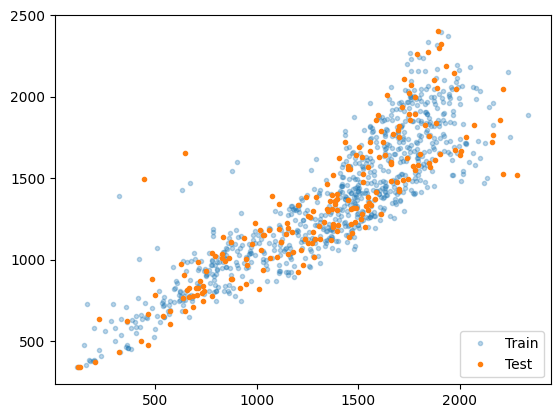

In [2]:
#Load data into frames
data = "public_cases.csv"
df = pd.read_csv(data)

x = df[['input/trip_duration_days','input/miles_traveled','input/total_receipts_amount']]
y = df['expected_output']

#Split into testing and training
xTrain, xTest,yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)

#Train model
linModel = LinearRegression()
linModel.fit(xTrain,yTrain)

#Show results
variance = linModel.score(xTest, yTest)
print("Variance:",variance)

plt.plot(yTrain, linModel.predict(xTrain),'.',label = "Train", alpha=0.3)
plt.plot(yTest, linModel.predict(xTest),'.', label = "Test")
plt.legend(loc='lower right')
plt.show()



# Decision Tree

In [3]:
#Train Decision Tree
treeModel = DecisionTreeRegressor()
treeModel = treeModel.fit(xTrain, yTrain)

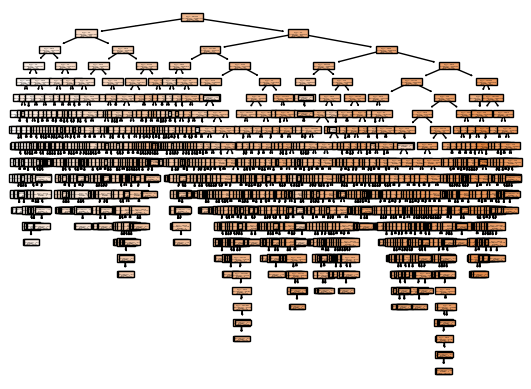

In [ ]:
plot_tree(treeModel, filled=True)
plt.show()

In [8]:
#Make predictions and see accuracy
yPred = treeModel.predict(xTest)
score = r2_score(yTest, yPred, force_finite=True)
print("R2 score:", score)

R2 score: 0.8314520538087342


# Neural Network

In [38]:
#Train Decision Tree
nnModel = MLPRegressor(activation='relu', solver='adam', learning_rate = 'adaptive', max_iter = 800, verbose = False)
nnModel.fit(xTrain, yTrain)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(learning_rate='adaptive', max_iter=800)

In [39]:
#See accuracy score
nnScore = nnModel.score(xTest, yTest)
print("Score:",nnScore)

Score: 0.7663997271278997


# Decision rule extraction

In [ ]:
#Work in progress!